In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r"..\data\dataset\transfusion.csv", delimiter=",")

In [3]:
data.index +=1
display(data)
data.columns

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
1,2,50,12500,98,1
2,0,13,3250,28,1
3,1,16,4000,35,1
4,2,20,5000,45,1
5,1,24,6000,77,0
...,...,...,...,...,...
744,23,2,500,38,0
745,21,2,500,52,0
746,23,3,750,62,0
747,39,1,250,39,0


Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 1 to 748
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [ ]:
data = pd.DataFrame(data)
data = data.rename(columns={"Recency (months)":"Months", "Frequency (times)":"Frequencies", "Monetary (c.c. blood)":"Monetary", 
                            "Time (months)":"NumMonth","whether he/she donated blood in March 2007":"isDonate"})
data

,Months,Frequencies,Monetary,NumMonth,isDonate
1,2,50,12500,98,1
2,0,13,3250,28,1
3,1,16,4000,35,1
4,2,20,5000,45,1
5,1,24,6000,77,0
...,...,...,...,...,...
744,23,2,500,38,0
745,21,2,500,52,0
746,23,3,750,62,0
747,39,1,250,39,0


In [7]:
data['isDonate']

1      1
2      1
3      1
4      1
5      0
      ..
744    0
745    0
746    0
747    0
748    0
Name: isDonate, Length: 748, dtype: int64

In [8]:
data.describe()

,Months,Frequencies,Monetary,NumMonth,isDonate
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [9]:
data_isdonate = data.groupby(by=["isDonate"]).agg({"isDonate":"count"}).rename(columns={"isDonate": "numDonate"})
display(data_isdonate)


,numDonate
isDonate,
0,570
1,178


In [11]:
x = data.drop("isDonate", axis=1)
y = data['isDonate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=225)

print("Banyaknya data x train: ", x_train.shape)
print("Banyaknya data x test: ", x_test.shape)
print("Banyaknya data y train: ", y_train.shape)
print("Banyaknya data y test: ", y_test.shape)

Banyaknya data x train:  (598, 4)
Banyaknya data x test:  (150, 4)
Banyaknya data y train:  (598,)
Banyaknya data y test:  (150,)


In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

svm = SVC()
rf = RandomForestClassifier() # boleh isi random state 225 atau 42
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=47)
rf = RandomForestClassifier()


In [14]:
def findMetrics(test, pred, model_label):
    print("\n")
    print("Klasifikasi "+ model_label +":\n")

    labels_test = np.sort(test.unique())
    cm = confusion_matrix(test, pred, labels=labels_test)
    print("Confusion Matrix")
    print(cm)

    print("\n")
    print("Accuracy:", accuracy_score(test, pred) * 100)
    print("Precision:", precision_score(test, pred, average='macro') * 100)
    print("Recall:", recall_score(test, pred, average='macro') * 100)
    print("F1-Score:", f1_score(test, pred, average='macro') * 100)
    print("\n")
    print(classification_report(test, pred))
    
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=labels_test, yticklabels=labels_test)
    plt.title('Confusion Matrix', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top')
    plt.ylabel('Actual', fontsize=13)
    plt.xlabel('Predicted', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.show()

def train_model(classification, x_train, y_train):
    model = classification
    train = model.fit(x_train, y_train)
    return train



Klasifikasi Support Vector Machine:

Confusion Matrix
[[100   6]
 [ 41   3]]


Accuracy: 68.66666666666667
Precision: 52.12765957446809
Recall: 50.578902229845625
F1-Score: 46.146207318004734


              precision    recall  f1-score   support

           0       0.71      0.94      0.81       106
           1       0.33      0.07      0.11        44

    accuracy                           0.69       150
   macro avg       0.52      0.51      0.46       150
weighted avg       0.60      0.69      0.61       150



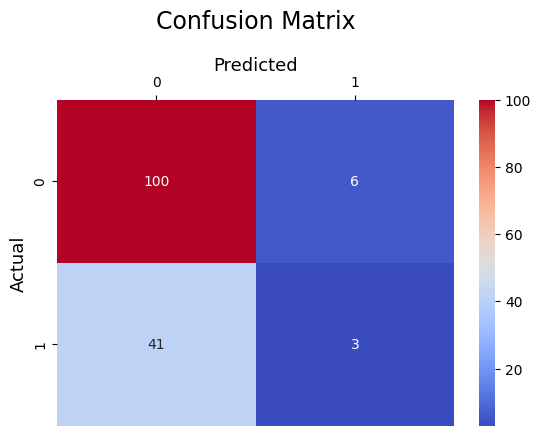



Klasifikasi Logistic Regression:

Confusion Matrix
[[100   6]
 [ 39   5]]


Accuracy: 70.0
Precision: 58.698495748855464
Recall: 52.85162950257289
F1-Score: 49.90723562152134


              precision    recall  f1-score   support

           0       0.72      0.94      0.82       106
           1       0.45      0.11      0.18        44

    accuracy                           0.70       150
   macro avg       0.59      0.53      0.50       150
weighted avg       0.64      0.70      0.63       150



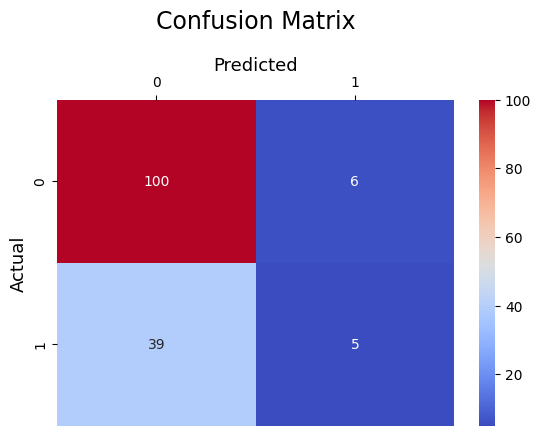



Klasifikasi Decision Tree:

Confusion Matrix
[[85 21]
 [30 14]]


Accuracy: 66.0
Precision: 56.95652173913044
Recall: 56.00343053173242
F1-Score: 56.183057448880234


              precision    recall  f1-score   support

           0       0.74      0.80      0.77       106
           1       0.40      0.32      0.35        44

    accuracy                           0.66       150
   macro avg       0.57      0.56      0.56       150
weighted avg       0.64      0.66      0.65       150



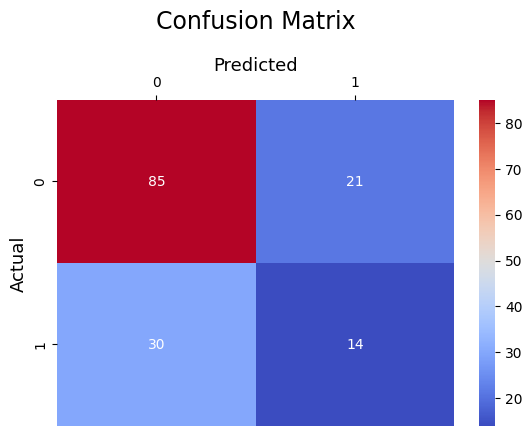



Klasifikasi K-Nearest Neighbor:

Confusion Matrix
[[106   0]
 [ 44   0]]


Accuracy: 70.66666666666667
Precision: 35.333333333333336
Recall: 50.0
F1-Score: 41.40625


              precision    recall  f1-score   support

           0       0.71      1.00      0.83       106
           1       0.00      0.00      0.00        44

    accuracy                           0.71       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.50      0.71      0.59       150



C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

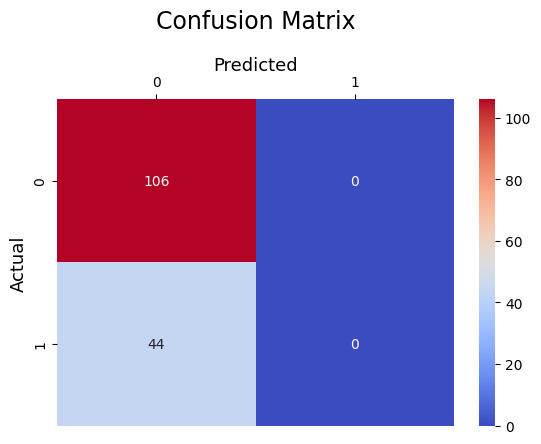



Klasifikasi Random Forest:

Confusion Matrix
[[85 21]
 [30 14]]


Accuracy: 66.0
Precision: 56.95652173913044
Recall: 56.00343053173242
F1-Score: 56.183057448880234


              precision    recall  f1-score   support

           0       0.74      0.80      0.77       106
           1       0.40      0.32      0.35        44

    accuracy                           0.66       150
   macro avg       0.57      0.56      0.56       150
weighted avg       0.64      0.66      0.65       150



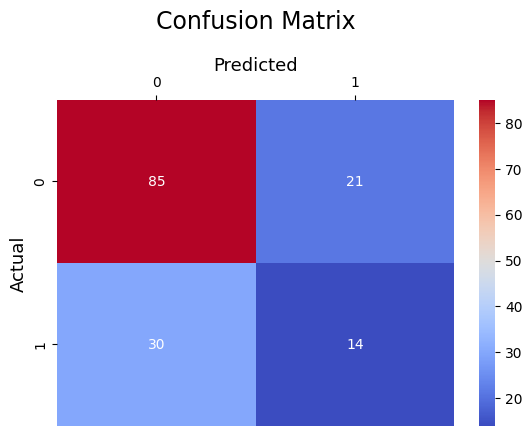

In [ ]:
classification = [svm, lr, dt, knn, rf]
clf_label = ['Support Vector Machine', 'Logistic Regression', 'Decision Tree', 'K-Nearest Neighbor', 'Random Forest']

for i in range(len(classification)):
    train = train_model(classification[i], x_train, y_train)
    y_pred = train.predict(x_test)
    findMetrics(y_test, y_pred, clf_label[i])



Klasifikasi Multinomial Naive Bayes:

Confusion Matrix
[[79 27]
 [19 25]]


Accuracy: 69.33333333333334
Precision: 64.34458398744113
Recall: 65.67324185248712
F1-Score: 64.7671568627451


              precision    recall  f1-score   support

           0       0.81      0.75      0.77       106
           1       0.48      0.57      0.52        44

    accuracy                           0.69       150
   macro avg       0.64      0.66      0.65       150
weighted avg       0.71      0.69      0.70       150



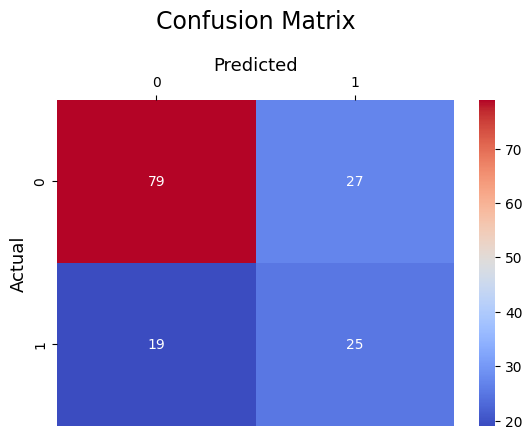



Klasifikasi Complement Naive Bayes:

Confusion Matrix
[[68 38]
 [16 28]]


Accuracy: 64.0
Precision: 61.68831168831169
Recall: 63.893653516295025
F1-Score: 61.24401913875598


              precision    recall  f1-score   support

           0       0.81      0.64      0.72       106
           1       0.42      0.64      0.51        44

    accuracy                           0.64       150
   macro avg       0.62      0.64      0.61       150
weighted avg       0.70      0.64      0.66       150



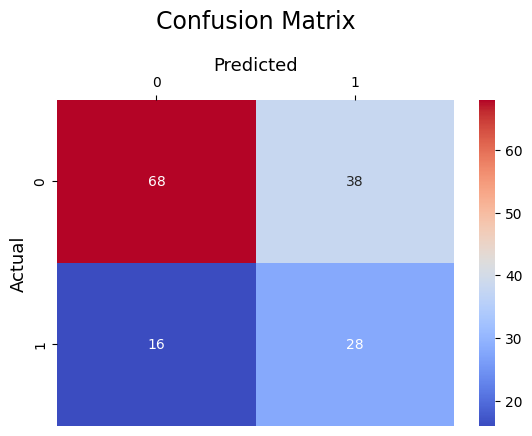



Klasifikasi Bernoulli Naive Bayes:

Confusion Matrix
[[106   0]
 [ 44   0]]


Accuracy: 70.66666666666667
Precision: 35.333333333333336
Recall: 50.0
F1-Score: 41.40625


              precision    recall  f1-score   support

           0       0.71      1.00      0.83       106
           1       0.00      0.00      0.00        44

    accuracy                           0.71       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.50      0.71      0.59       150



C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

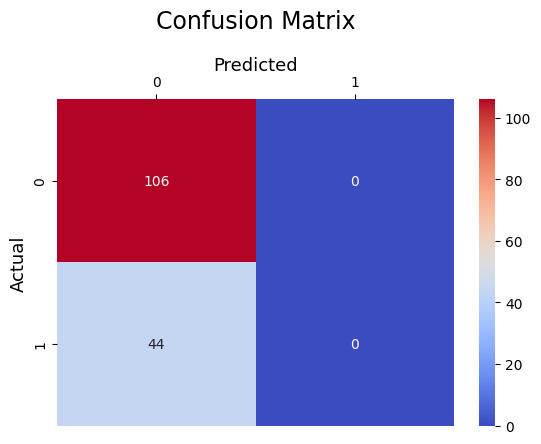

In [16]:
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

modelNB = [mnb, cnb, bnb]
modelNB_label = ['Multinomial Naive Bayes', 'Complement Naive Bayes', 'Bernoulli Naive Bayes']


for i in range(len(modelNB)):
    train = train_model(modelNB[i], x_train, y_train)
    y_pred = train.predict(x_test)
    findMetrics(y_test, y_pred, modelNB_label[i])